# Simple Linear Regression 

# Find a good model to get a delivery time.

In [69]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [70]:
data = pd.read_csv("delivery_time.csv")
data.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [8]:
data[data.isnull()].sum()

Delivery Time    0.0
Sorting Time     0.0
dtype: float64

In [9]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [10]:
data.value_counts()

Delivery Time  Sorting Time
29.00          10              1
16.68          7               1
9.50           3               1
10.75          4               1
11.50          3               1
12.03          3               1
13.50          4               1
13.75          6               1
14.88          4               1
15.35          6               1
17.83          7               1
24.00          9               1
17.90          10              1
18.11          7               1
18.75          9               1
19.00          7               1
19.75          6               1
19.83          8               1
21.00          10              1
21.50          5               1
8.00           2               1
dtype: int64

In [12]:
print(data.shape,"Shape of DataFrame")
print("="*27)
print(data.head(20))

(21, 2) Shape of DataFrame
    Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7


# Visualization

In [42]:
data = data.rename({'Delivery Time': 'DT','Sorting Time': 'ST'}, axis=1)

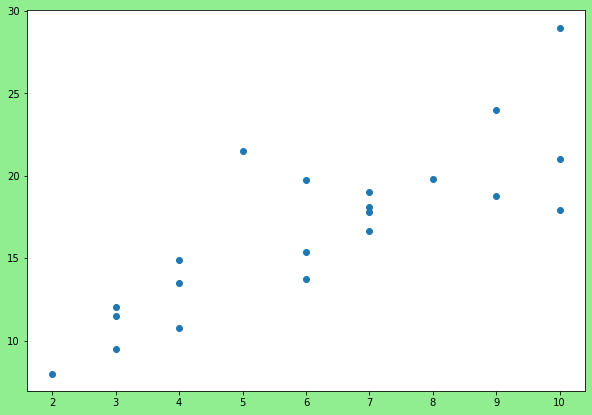

In [44]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(data["ST"],data["DT"]);


It is positively linearly spread.

In [18]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


# Create a model with SKLEARN

In [45]:
ls = LinearRegression()

x = data["ST"].values.reshape(-1,1)
y = data["DT"].values.reshape(-1,1)

reg_sklearn = ls.fit(x,y)

In [46]:
print (reg_sklearn.coef_)
print (reg_sklearn.intercept_)

[[1.6490199]]
[6.58273397]


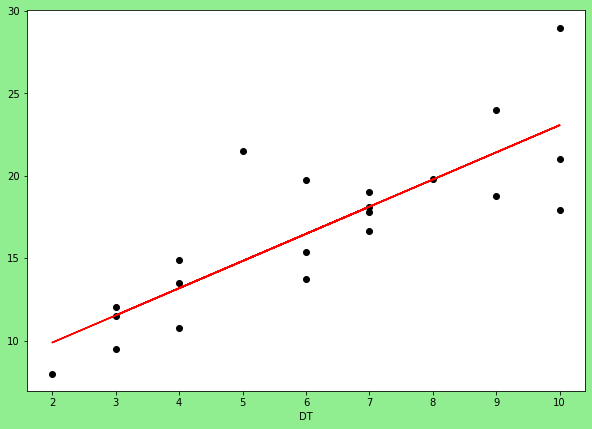

In [47]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(data["ST"],data["DT"],color="black");
plt.plot(data["ST"],data["ST"]*reg_sklearn.coef_[0]+reg_sklearn.intercept_,color="red");
plt.xlabel("ST");
plt.xlabel("DT");
plt.show()

# Model validation

In [48]:
pred_train_lm=reg_sklearn.predict(data["ST"].values.reshape(-1,1)).flatten().tolist()
r2_score(data["DT"],pred_train_lm)

0.6822714748417231

# Model with statsmodels

In [49]:
first_model =smf.ols("DT~ST",data=data).fit()
pred_statsmodel = first_model.predict(data["ST"])
r2_score(data["DT"],pred_train_lm)

0.6822714748417231

In [50]:
first_model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [53]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           3.98e-06
Time:                        19:48:02   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Here from above OLS regression results R-Squared value is 0.682 which is not greater than 0.85 hence we cannot say this model1 is good for predict Delivery TIme.

# Second Model

In [58]:
second_model =smf.ols("DT~np.log(ST)",data=data).fit()
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           2.64e-06
Time:                        21:23:42   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Here from above OLS regression results R-Squared value is 0.695 which is not greater than 0.85 hence we cannot say this  Second model is good for predict Delivery TIme.

In [68]:
data["ST_Squre"]=data.ST**2
Third_model=smf.ols("DT~ST+ST_Squre",data=data).fit()
Third_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           2.39e-05
Time:                        22:22:41   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5222      4.160      0.847      0.408      -5.217      12.261
ST             2.8130      1.461      1.926      0.070      -0.256       5.882
ST_Squre      -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Here from above OLS regression results # R-Squared value is 0.693 which is not greater than 0.85 hence we cannot say this Third model is good for predict Delivery TIme.

In [66]:
Forth_model =smf.ols("np.log(DT)~ST",data=data).fit()
Forth_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           1.59e-06
Time:                        21:29:50   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Here from above OLS regression results R-Squared value is 0.711 which is not greater than 0.85 but it is good comparitively others.